In [3]:
%matplotlib inline

In [4]:
### Import Packages

import matplotlib.pyplot as plt
import numpy as np
import starry
import pandas as pd
from glob import glob
import os
from scipy.interpolate import interp1d
from scipy.linalg import block_diag
import theano
import theano.tensor as tt
import theano.sparse as ts

In [5]:
#### Read in light curves, set an error:
r5_0degree = np.loadtxt("lightcurve_bd/totalflux_r5_0degree.txt")

## Rotation period 5 hours 0 degrees (equator on)
r5_0degree_flux = r5_0degree[1]
r5_0degree_flux = r5_0degree_flux/np.median(r5_0degree_flux)
r5_0degree_flux = r5_0degree_flux.round(4)
time_r5_0degree =  r5_0degree[0]

## Error
sigma=0.001

In [15]:
### Map function

def SurfaceMap(flux,ydeg,time,rotation_period,inc_angle,x):
    ## Instantiate the map
    map = starry.Map(ydeg=ydeg, reflected=False)
    map.obl = 0
    map.inc = inc_angle
    map.set_data(flux, C=0.001 ** 2)
    ## Counter for naming files
    x+=1
    ## Other map parameters
    mu = np.empty(map.Ny)
    mu[0] = 1
    mu[1:] = 0
    L = np.empty(map.Ny)
    L[0] = 1e0
    L[1:] = 1e-5
    map.set_prior(L=L)
    nrot=max(time)/rotation_period
    npts = len(time)
    theta = np.linspace(0, 360 * nrot, npts)
    kwargs = dict(theta=theta)
    mu, cho_cov = map.solve(**kwargs)
    map.show(colorbar=True,figsize=(5,5), projection="moll",dpi=500,file="RotationSplit_r5_0degree_ydeg"+str(ydeg)+"/Maps/"+str(i)+"_map.jpg")
    ## Plotting
    fig, ax = plt.subplots(1, figsize=(12, 4))
    plt.plot(time, flux)
    plt.text(time[0],1.01,s="t="+str(time[0]),fontsize=15)
    plt.ylim(0.98,1.02)
    #plt.plot(time, map.flux())
    ax.set_xlabel("Time (hr)", fontsize=18)
    ax.set_ylabel("Normalized flux", fontsize=18)
    plt.savefig("RotationSplit_r5_0degree_ydeg"+str(ydeg)+"/LightCurves/"+str(i)+"_LightCurve.jpg")

In [9]:
### Create an array to index with

IndexArray = np.arange(0,401,20)
x=0

###### Rotation Period: 5 Hours
###### Inclination Angle: 90 Degrees

Pre-computing some matrices... Done.
Compiling `render`... Done.
/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)
Pre-computing some matrices... Done.
Compiling `render`... Done.
/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)
Pre-computing some matrices... Done.
Compiling `render`... Done.
/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)
Pre-computing some matrices... Done.
Compiling `render`... Done.
/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)
Pre-computing some matrices... Done.
Compiling `render`... Done.
/op

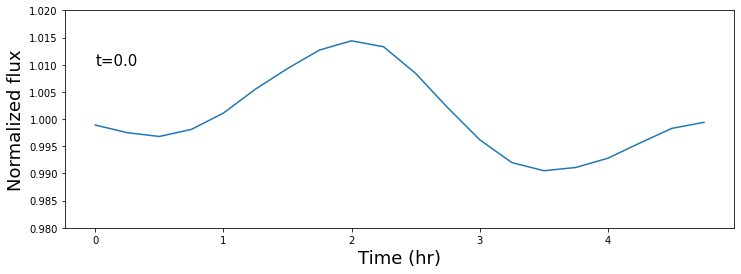

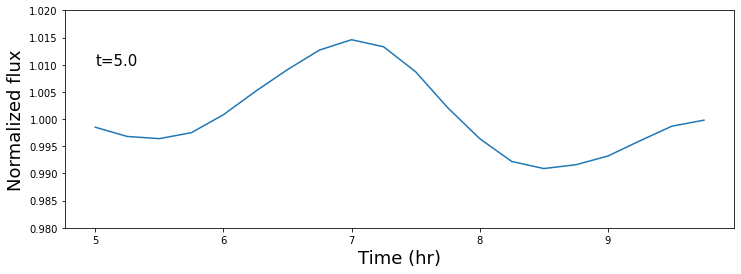

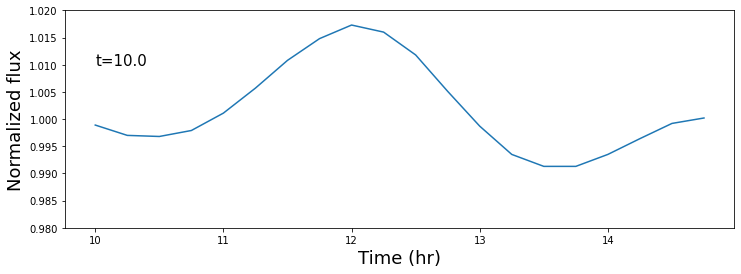

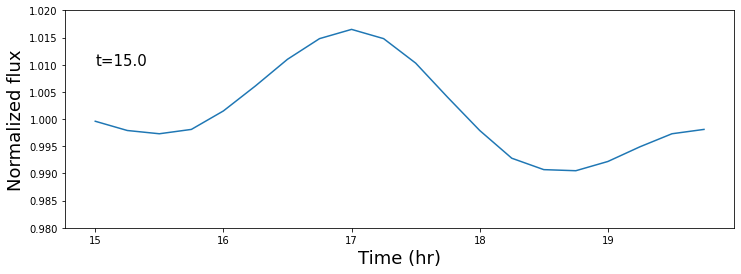

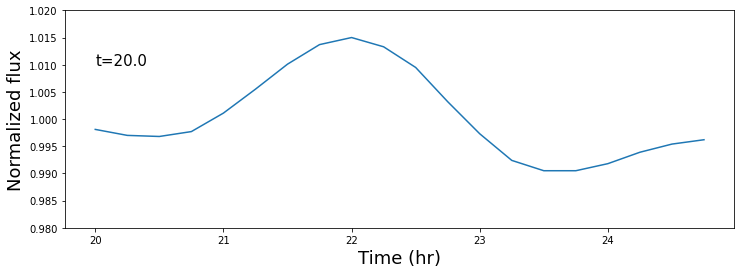

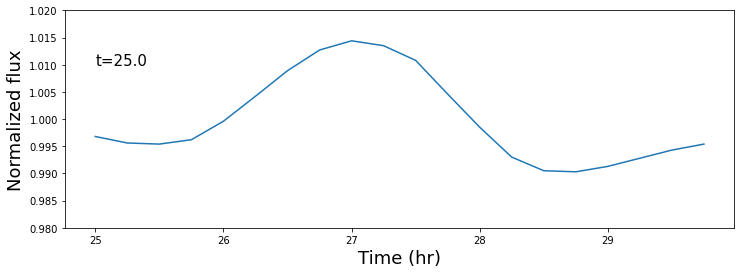

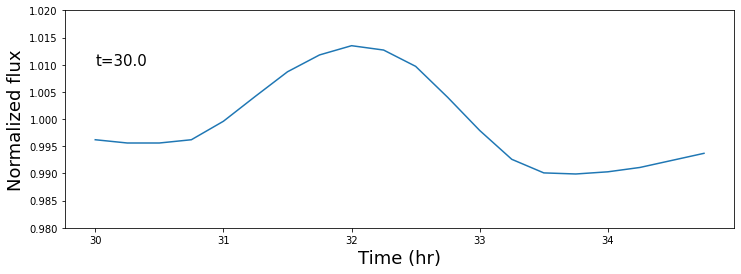

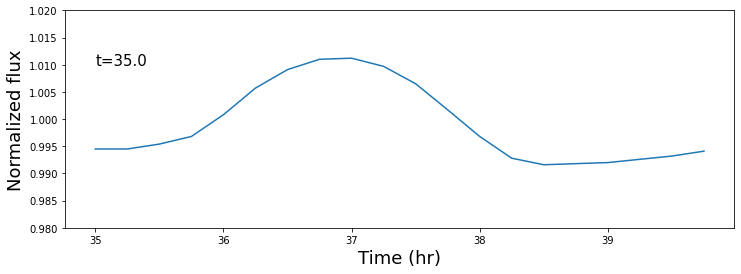

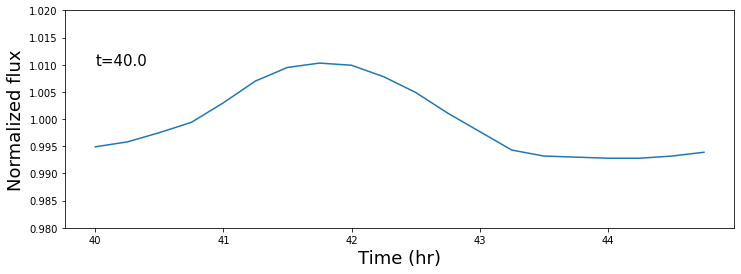

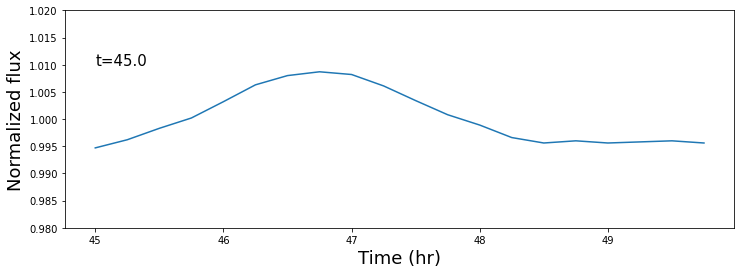

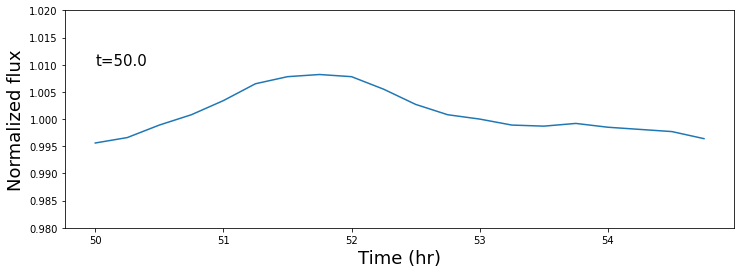

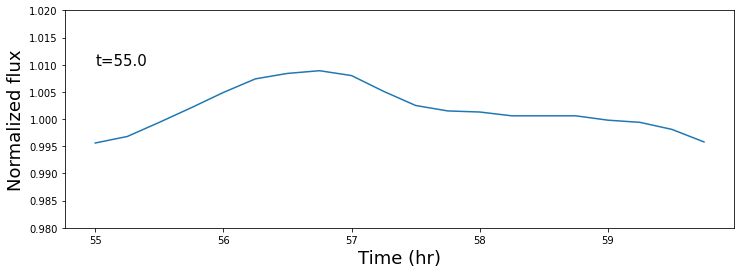

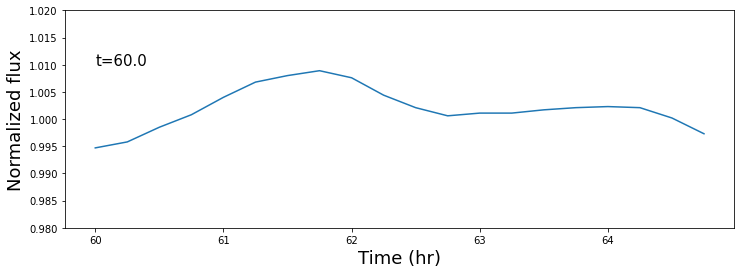

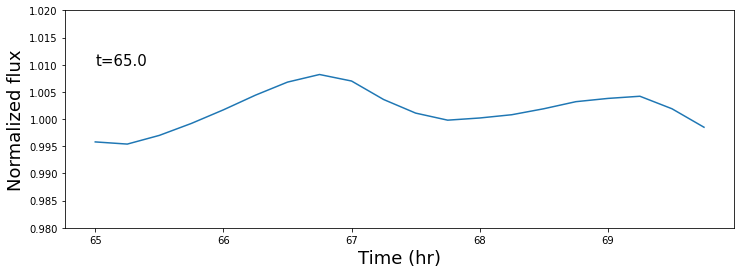

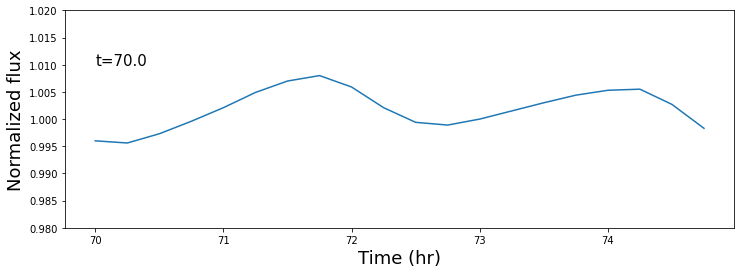

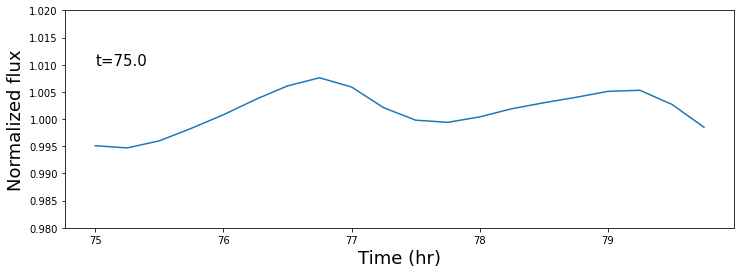

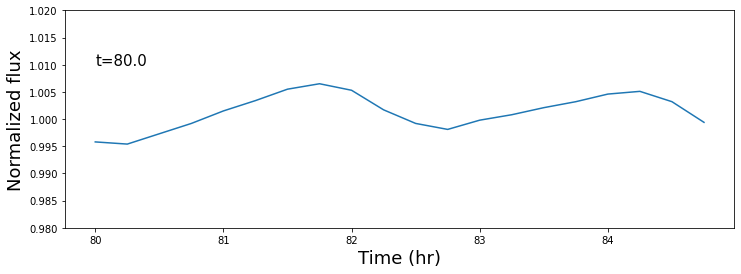

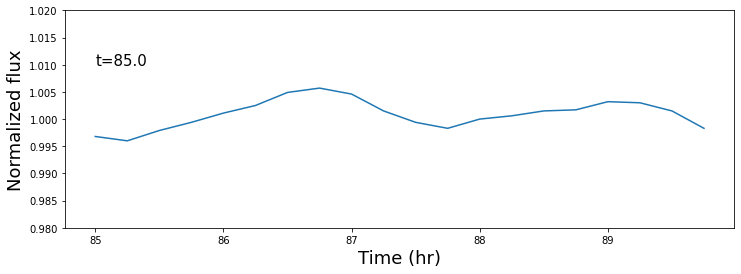

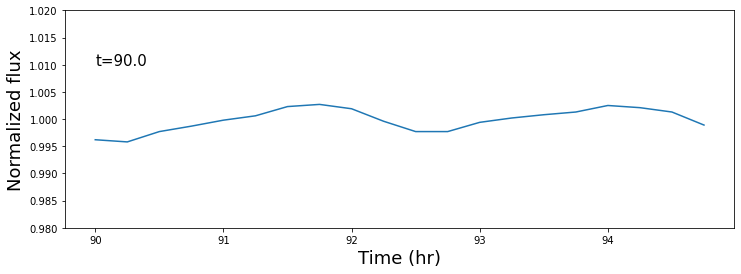

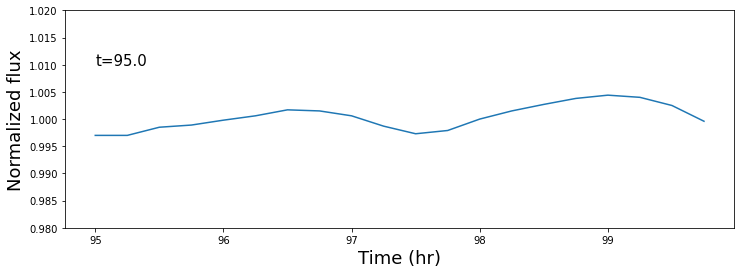

In [16]:
### Create a loop to save multiple maps ydeg 5

for i in range(len(IndexArray)-1):
    SurfaceMap(r5_0degree_flux[IndexArray[i]:IndexArray[i+1]],5,time_r5_0degree[IndexArray[i]:IndexArray[i+1]],5,90,x)

Pre-computing some matrices... Done.


TypeError: object of type 'TensorVariable' has no len()

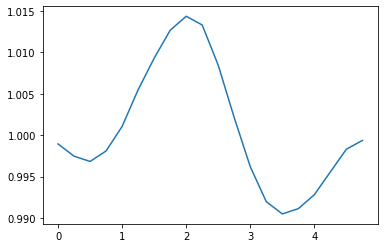

In [3]:
map = starry.Map(ydeg=5, reflected=False)
map.obl = 0
map.inc = 90
map.set_data(r5_0degree_flux[0:20], C=0.001 ** 2)
mu = np.empty(map.Ny)
mu[0] = 1
mu[1:] = 0
L = np.empty(map.Ny)
L[0] = 1e0
L[1:] = 1e-5
map.set_prior(L=L)
nrot=max(time_r5_0degree[0:20])/5
npts = len(time_r5_0degree[0:20])
theta = np.linspace(0, 360 * nrot, npts)
kwargs = dict(theta=theta)
mu, cho_cov = map.solve(**kwargs)
plt.plot(time_r5_0degree[0:20], r5_0degree_flux[0:20])
plt.plot(time_r5_0degree[0:20], map.flux())